## Install the code

The DSGRN code is available at https://github.com/marciogameiro/DSGRN.git.

The pyCHomP code is available at https://github.com/marciogameiro/pyCHomP2.git. 

The DSGRN code is used to manipulate the parameter graph of a network and the pyCHomP code is used to compute homology. 

The code to define the multivalued maps defined in the thesis and to compute the Conley-Morse graphs are available at https://github.com/marciogameiro/DSGRN_utils.git. 

This code will soon be included in the DSGRN package, but for the moment it is on a separate repository. The repositories above are not needed to use the code. All one needs to do is install the code using the commands below.

In [1]:
# Install DSGRN (and pyCHomP)
%pip install DSGRN

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [2]:
# Install the rook field paper code
%pip install git+https://github.com/marciogameiro/DSGRN_utils.git

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Cloning https://github.com/marciogameiro/DSGRN_utils.git to c:\users\bernardo\appdata\local\temp\pip-req-build-5rpzuer4
  Resolved https://github.com/marciogameiro/DSGRN_utils.git to commit 98e72462b8398a64d28aff01155b32905888f1c2
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/marciogameiro/DSGRN_utils.git 'C:\Users\Bernardo\AppData\Local\Temp\pip-req-build-5rpzuer4'


## Import and run the code

In [3]:
import DSGRN
import DSGRN_utils

import random
import time

# 16.1 Identifying Global Dynamics and Global Bifurcations

## Example 16.1.1

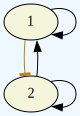

In [4]:
# Network specification is given by a string
net_spec = """1 : 1 + 2
              2 : (~1) 2"""

# Define the network
network = DSGRN.Network(net_spec)

# Plot the regulatory network obtained
DSGRN.DrawGraph(network)

In [5]:
# Define the parameter graph
parameter_graph = DSGRN.ParameterGraph(network)
print('Number of parameters nodes:', parameter_graph.size())

Number of parameters nodes: 1600


In [6]:
# Pick a parameter index
par_index = 752

# Define the parameter
parameter = parameter_graph.parameter(par_index)

In [7]:
# Compute Conley-Morse graph
morse_graph, stg, graded_complex = DSGRN_utils.ConleyMorseGraph(parameter)

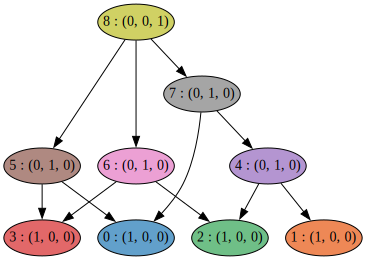

In [8]:
# Plot Morse graph
DSGRN_utils.PlotMorseGraph(morse_graph)

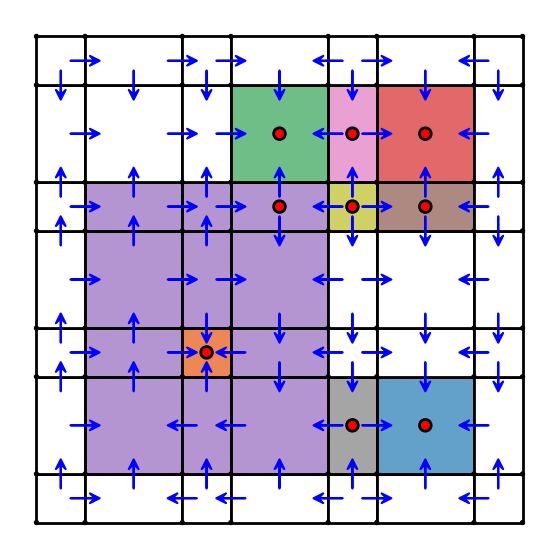

In [9]:
# Plot Morse sets (only works for 2-node networks (2D) at the moment)
# Dots indicate self edges (equilibrium cells)
DSGRN_utils.PlotMorseSets(morse_graph, stg, graded_complex)

## Example 16.1.2

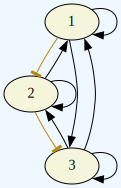

In [10]:
# Network specification is given by a string
net_spec = """1 : 1+2+3
              2 : (~1)(2+3)
              3 : (~2)(1+3)      """

# Define the network
network = DSGRN.Network(net_spec)

# Plot the regulatory network obtained
DSGRN.DrawGraph(network)

In [11]:
# Define the parameter graph
parameter_graph = DSGRN.ParameterGraph(network)
print('Number of parameters nodes:', parameter_graph.size())

Number of parameters nodes: 87280405632


In [12]:
# Pick a different parameter
par_index = 52718681992

parameter = parameter_graph.parameter(par_index)

In [13]:
morse_graph, stg, graded_complex = DSGRN_utils.ConleyMorseGraph(parameter)

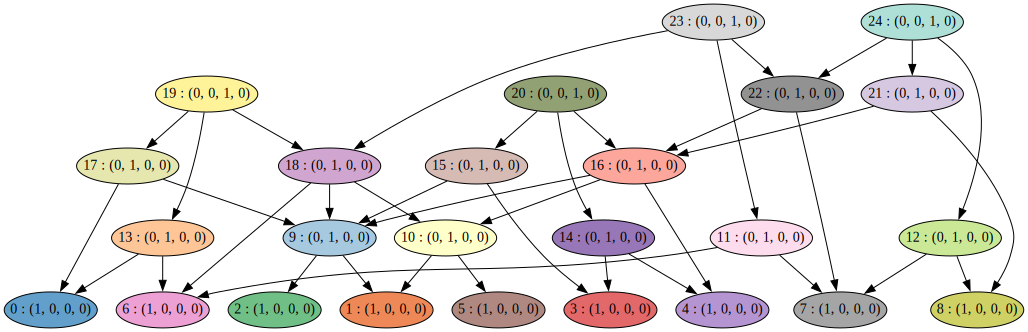

In [14]:
DSGRN_utils.PlotMorseGraph(morse_graph)

# Section 16.2 Identifying Periodic Orbits

## Example 16.2.1

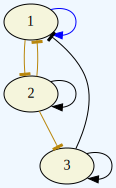

In [15]:
net_spec = """1 : (1)(~2)(~3)
              2 : (~1)(2)
              3 : (~2)(3)"""

network = DSGRN.Network(net_spec)

DSGRN.DrawGraph(network)

In [16]:
parameter_graph = DSGRN.ParameterGraph(network)

print('Parameter graph size:', parameter_graph.size())

Parameter graph size: 3600000


In [17]:
par_index = 2472287

parameter = parameter_graph.parameter(par_index)

In [18]:
%%time
morse_graph, stg, graded_complex = DSGRN_utils.ConleyMorseGraph(parameter)

CPU times: total: 78.1 ms
Wall time: 87.4 ms


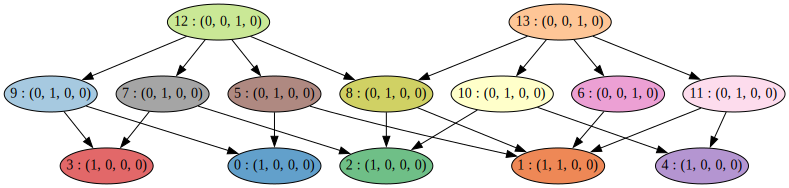

In [19]:
DSGRN_utils.PlotMorseGraph(morse_graph)

## Example 16.2.2

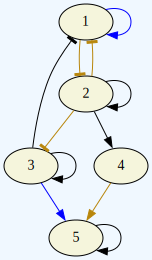

In [20]:
net_spec = """
  1 : 1(~2)(~3)
  2 : (~1)(2)
  3 : (~2)(3)
  4 : (2)
  5 : (3)(4)(5)
"""

network = DSGRN.Network(net_spec)

DSGRN.DrawGraph(network)

In [21]:
parameter_graph = DSGRN.ParameterGraph(network)

print('Parameter graph size:', parameter_graph.size())

Parameter graph size: 13608000000


In [22]:
par_index = 5103162287

parameter = parameter_graph.parameter(par_index)

In [23]:
%%time
morse_graph, stg, graded_complex = DSGRN_utils.ConleyMorseGraph(parameter)

CPU times: total: 11.6 s
Wall time: 11.8 s


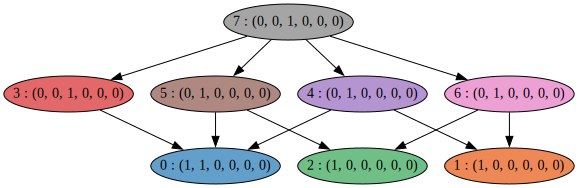

In [24]:
DSGRN_utils.PlotMorseGraph(morse_graph)

## Example 16.2.3

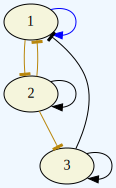

In [25]:
net_spec = """
  1 : 1(~2)(~3)
  2 : (~1)(2)
  3 : (~2)(3)
"""

network = DSGRN.Network(net_spec)

DSGRN.DrawGraph(network)

In [26]:
parameter_graph = DSGRN.ParameterGraph(network)

print('Parameter graph size:', parameter_graph.size())

Parameter graph size: 3600000


In [27]:
par_index =  2023186

parameter = parameter_graph.parameter(par_index)

In [28]:
%%time
morse_graph, stg, graded_complex = DSGRN_utils.ConleyMorseGraph(parameter)

CPU times: total: 109 ms
Wall time: 104 ms


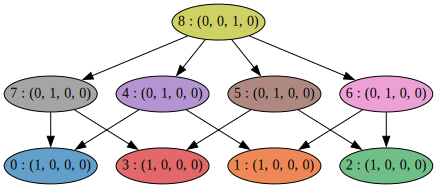

In [29]:
DSGRN_utils.PlotMorseGraph(morse_graph)

# Section 16.3 Global Semi-conjugacies

## Example 16.3.1

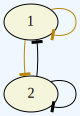

In [30]:
net_spec = """1 : (~1)(~2)
              2 : (~1)(~2)
            """

network = DSGRN.Network(net_spec)

DSGRN.DrawGraph(network)

In [31]:
parameter_graph = DSGRN.ParameterGraph(network)

print('Number of parameters:', parameter_graph.size())

Number of parameters: 1600


In [32]:
par_index = 974

parameter = parameter_graph.parameter(par_index)

In [33]:
%%time
morse_graph, stg, graded_complex = DSGRN_utils.ConleyMorseGraph(parameter)

CPU times: total: 15.6 ms
Wall time: 10.9 ms


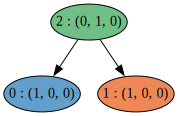

In [34]:
DSGRN_utils.PlotMorseGraph(morse_graph)

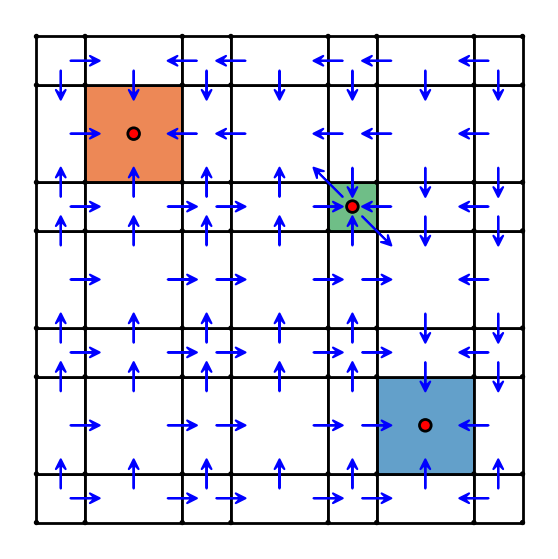

In [35]:
DSGRN_utils.PlotMorseSets(morse_graph, stg, graded_complex)

## Example 16.3.2

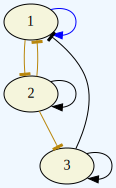

In [36]:
net_spec = """
  1 : 1(~2)(~3)
  2 : (~1)(2)
  3 : (~2)(3)
"""

network = DSGRN.Network(net_spec)

DSGRN.DrawGraph(network)

In [37]:
parameter_graph = DSGRN.ParameterGraph(network)

print('Number of parameters:', parameter_graph.size())

Number of parameters: 3600000


In [38]:
par_index = 2472286

parameter = parameter_graph.parameter(par_index)

In [39]:
%%time
morse_graph, stg, graded_complex = DSGRN_utils.ConleyMorseGraph(parameter)

CPU times: total: 109 ms
Wall time: 87.3 ms


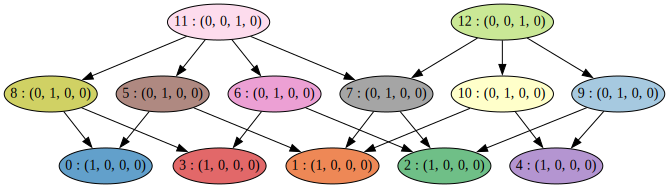

In [40]:
DSGRN_utils.PlotMorseGraph(morse_graph)

## Example 16.3.3

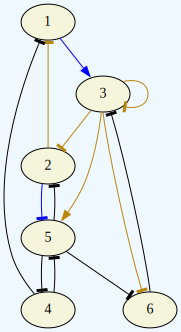

In [41]:
net_spec = """
  1 : (~2)(~4)
  2 : (~3)(~5)
  3 : (1)(~3)(~6)
  4 : (~5)
  5 : (~2)(~4)(3)
  6 : (~3)(~5)
"""

network = DSGRN.Network(net_spec)

DSGRN.DrawGraph(network)

In [42]:
parameter_graph = DSGRN.ParameterGraph(network)

print('Number of parameters:', parameter_graph.size())

Number of parameters: 4429771960320


In [43]:
par_index = 2684686006

parameter = parameter_graph.parameter(par_index)

In [44]:
%%time
morse_graph, stg, graded_complex = DSGRN_utils.ConleyMorseGraph(parameter,level=2)

CPU times: total: 2min 42s
Wall time: 2min 45s


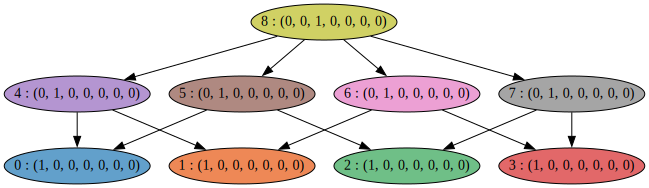

In [45]:
DSGRN_utils.PlotMorseGraph(morse_graph)

# Section 16.4 Morse graphs that are not Morse representations

## Example 16.4.1

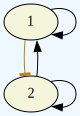

In [46]:
# Network specification is given by a string
net_spec = """1 : 1 + 2
              2 : (~1) 2"""

# Define the network
network = DSGRN.Network(net_spec)

# Plot the regulatory network obtained
DSGRN.DrawGraph(network)

In [47]:
# Define the parameter graph
parameter_graph = DSGRN.ParameterGraph(network)
print('Number of parameters nodes:', parameter_graph.size())

Number of parameters nodes: 1600


In [48]:
# Pick a parameter index
par_index = 47

# Define the parameter
parameter = parameter_graph.parameter(par_index)

In [49]:
# Compute Conley-Morse graph
morse_graph, stg, graded_complex = DSGRN_utils.ConleyMorseGraph(parameter)

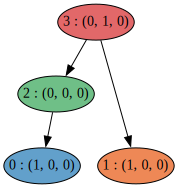

In [50]:
# Plot Morse graph
DSGRN_utils.PlotMorseGraph(morse_graph)

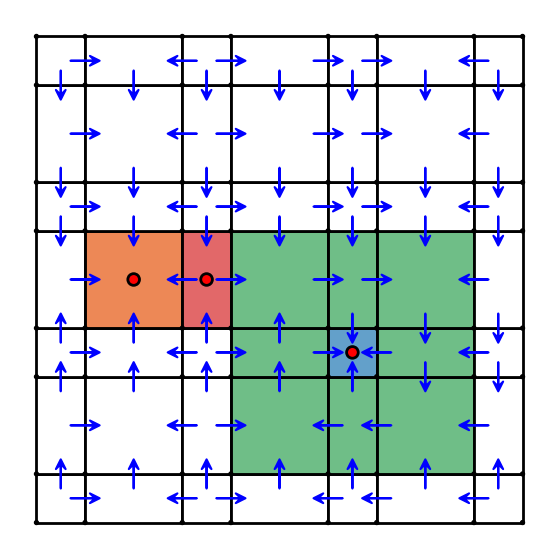

In [51]:
# Plot Morse sets (only works for 2-node networks (2D) at the moment)
# Dots indicate self edges (equilibrium cells)
DSGRN_utils.PlotMorseSets(morse_graph, stg, graded_complex)

## Example 16.4.2

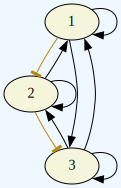

In [52]:
# Network specification is given by a string
net_spec = """1 : 1+2+3
              2 : (~1)(2+3)
              3 : (~2)(1+3)      """

# Define the network
network = DSGRN.Network(net_spec)

# Plot the regulatory network obtained
DSGRN.DrawGraph(network)

In [53]:
# Define the parameter graph
parameter_graph = DSGRN.ParameterGraph(network)
print('Number of parameters nodes:', parameter_graph.size())

Number of parameters nodes: 87280405632


In [54]:
# Pick a different parameter
par_index = 65571607721

parameter = parameter_graph.parameter(par_index)

In [55]:
morse_graph, stg, graded_complex = DSGRN_utils.ConleyMorseGraph(parameter)

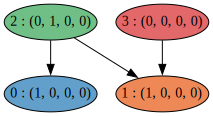

In [56]:
DSGRN_utils.PlotMorseGraph(morse_graph)

## Example 16.4.3

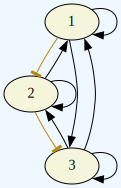

In [57]:
# Network specification is given by a string
net_spec = """1 : 1+2+3
              2 : (~1)(2+3)
              3 : (~2)(1+3)      """

# Define the network
network = DSGRN.Network(net_spec)

# Plot the regulatory network obtained
DSGRN.DrawGraph(network)

In [58]:
# Define the parameter graph
parameter_graph = DSGRN.ParameterGraph(network)
print('Number of parameters nodes:', parameter_graph.size())

Number of parameters nodes: 87280405632


In [59]:
# Pick a different parameter
par_index = 52717613010

parameter = parameter_graph.parameter(par_index)

In [60]:
morse_graph, stg, graded_complex = DSGRN_utils.ConleyMorseGraph(parameter)

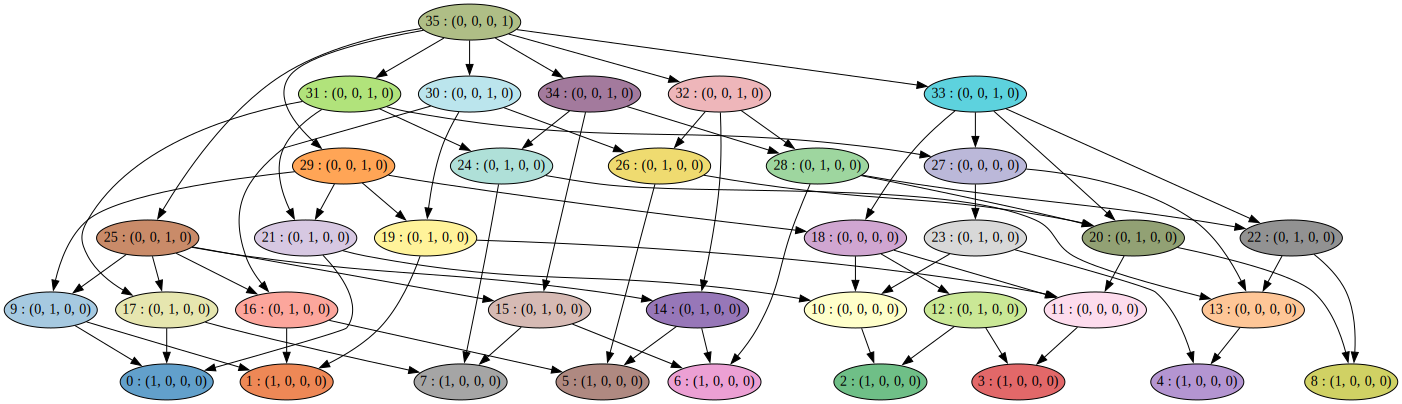

In [61]:
DSGRN_utils.PlotMorseGraph(morse_graph)

## Example 16.4.4

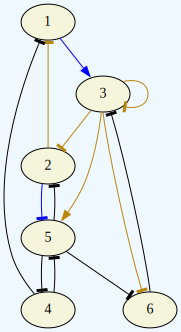

In [62]:
net_spec = """
  1 : (~2)(~4)
  2 : (~3)(~5)
  3 : (1)(~3)(~6)
  4 : (~5)
  5 : (~2)(~4)(3)
  6 : (~3)(~5)
"""

network = DSGRN.Network(net_spec)

DSGRN.DrawGraph(network)

In [63]:
parameter_graph = DSGRN.ParameterGraph(network)

print('Number of parameters:', parameter_graph.size())

Number of parameters: 4429771960320


In [64]:
par_index = 1739757491101

parameter = parameter_graph.parameter(par_index)

In [65]:
%%time
morse_graph, stg, graded_complex = DSGRN_utils.ConleyMorseGraph(parameter,level=2)

CPU times: total: 3min 2s
Wall time: 3min 4s


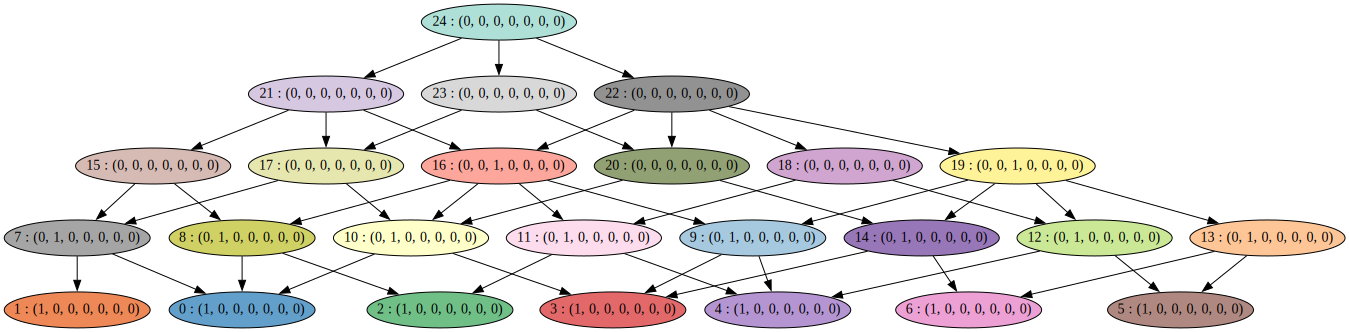

In [66]:
DSGRN_utils.PlotMorseGraph(morse_graph)